## 개요 

* 2024년 12회 산업통상자원부 공공데이터 활용 아이디어 공모전 참가해보기로 함
  * https://datacontest.kr/apply/applyAdd/3
* 공공데이터를 csv로 저장하지 않고 API로 활용해보기로 함

## 내용정리

### 과제 요약
* `과제명` : 핵심 광물별 공급위기 요소 탐지 모델 개발
* `과제 개요` : 핵심광물별 가격 변동성, 시세, 생산·수입국 현황 등으로 핵심 광물별로 공급 리스크를 줄일 수 있는 위기 요소 탐지 분석 모델 개발
* `제출 서류` : 분석 결과보고서(양식활용), 분석 코드, 근거데이터 파일
* `활용 계획` : 전기차 배터리, 반도체 등 첨단산업 민간기업에 다양한 핵심광물 수급현황 위기 요소 탐지에 대한 분석 방법, 결과 등을 제공하여 안정적인 수급리스크 정보지원 강화
* `유의사항`
  * 핵심광물의 수급현황 등을 기반으로 위기요소 탐지 분석
    * 광물가격 급등 등 변동성, 국제시세, 주요 생산·수입국 현황, 수입량·수입금액·수입의존도, 국내 비축확보율, 재자원화율 및 국내 주요 수요기업 정보 등

  * 인터넷에 공개되어 있는 모든 가용 데이터를 사용하여 자유롭게 작성
    * 단, 사용한 데이터는 출처를 표기하여 근거데이터로 제출<br>(참고 사이트 : 관세청, 외교부, 기재부, 산업부, 무역협회, 수출입은행 등)

### 분석대상 광물선정

* 공모전 인지 및 시작이 늦어서, `최대한 효율적`으로 진행하고자 함(1달이내 남음)
* 분석대상 광물을 공모전에 언급된 모든 광물보다는, `중요한 광물 위주`로 진행해보고자 함
  * 공모전에 언급된 광물 : 텅스텐, 코발트, 리튬, 망간, 니켈
* 고려 요소
  * 업종별 소요량 등을 기준으로 가장 공통적인/주요한 광물을 찾아보고자 함
  * **상기 자료는 찾기가 어려워, 생산량, 소비량, 수출입물량을 기준으로 상대적 비교를 해보고자 함**

### 공공데이터포털 API사용을 위한 파이썬 함수 작성

* API로 데이터 호출해보니 아래의 내용을 확인할 수 있었음
  * 호출 url의 'perPage'를 활용해 한번에 가져올 `데이터 수(행)을 정할 수 있음`
  * 호출된 json에서 currentCount와 totalCount로 `가져온 데이터와 전체 데이터를 확인할 수 있음`

* 확인한 내용을 기반으로, 공공데이터포털에서 `json을 지원하는 데이터는 별도 조작없이 가능하게 하자는 목적`으로 함수작성함
  * 일단 1개만 호출하여 전체 데이터 수량을 확인하고, perPage값을 바꿔 전체 데이터를 불러옴

In [2]:
import requests
import json
import pandas as pd

def request_and_to_json(url):
    response = requests.get(url)
    json_ob = json.loads(response.text)
    return json_ob

def chk_json_status_of_data_go_kr(json_obj):
    other_data = ['currentCount', 'matchCount', 'page', 'perPage', 'totalCount']
    result_dict = dict()
    
    for each_column in other_data:
        result_dict[each_column] = json_obj[each_column]  
    return result_dict 

def download_from_data_go_kr_with_json(url):
    json_ob = request_and_to_json(url)

    json_status = chk_json_status_of_data_go_kr(json_ob)
    if json_status['currentCount'] < json_status['totalCount']:
        url = url.replace('perPage=1',f'perPage={json_status["totalCount"]}')
        json_ob = request_and_to_json(url)

    return json_ob

In [1]:
# API사용을 위한 개인키 입력
serviceKey = '(개인키)'

### 개별분석

#### 광종별 소요량
* 공공데이터포털 - 한국광해광업공단_광종별 소비현황 <br>
  https://www.data.go.kr/data/3070245/fileData.do#tab-layer-file

In [3]:
base_url = 'https://api.odcloud.kr/api'
address_get = '/3070245/v1/uddi:d950e6bc-e6a0-407c-baad-dfa87d739ff1_202004091120'
url = f'{base_url}{address_get}?page=1&perPage=1&serviceKey={serviceKey}'
json_1 = download_from_data_go_kr_with_json(url)
chk_json_status_of_data_go_kr(json_1)

{'currentCount': 410,
 'matchCount': 410,
 'page': 1,
 'perPage': 410,
 'totalCount': 410}

In [4]:
df_1 = pd.json_normalize(json_1['data'])
df_1

,2011 소비량,2012 소비량,2013 소비량,2014 소비량,2015 소비량,2016 소비량,2017 소비량,2018 소비량,2019 소비량,2020 소비량,2021 소비량,2022 소비량,2023 소비량,광종,국가,단위,대륙,품목
0,293.867,253.700,201.000,225.800,220.751,226.106,247.578,260.381,246.674,190.106,198.989,337.973,272.189,알루미늄,Austria,천톤,EUROPE,refined
1,10.200,10.200,10.200,29.598,21.898,30.197,27.001,27.052,31.673,29.178,39.481,3.276,2.400,알루미늄,Belarus,천톤,EUROPE,refined
2,382.312,344.280,236.780,202.967,231.648,184.982,212.039,233.065,181.368,138.809,204.808,257.193,160.985,알루미늄,Belgium,천톤,EUROPE,refined
3,52.188,53.527,60.645,87.027,109.824,110.526,109.522,111.927,119.211,95.958,128.057,121.134,97.254,알루미늄,Bulgaria,천톤,EUROPE,refined
4,77.771,83.684,76.755,66.065,24.672,52.033,96.463,112.930,136.757,143.869,159.163,135.867,129.308,알루미늄,Croatia,천톤,EUROPE,refined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,939.000,892.000,935.000,962.000,931.000,788.980,829.000,1800.000,1800.000,950.000,878.000,973.000,911.000,아연,U.S.A.,천톤,AMERICA,slab
406,0.000,0.520,0.514,0.304,0.449,0.316,0.312,0.235,0.235,0.299,0.350,0.360,0.371,아연,Uruguay,천톤,AMERICA,slab
407,10.430,6.656,9.014,4.872,2.246,1.994,0.685,0.596,0.596,0.442,0.360,0.300,0.370,아연,Venezuela,천톤,AMERICA,slab
408,207.319,116.293,180.000,174.400,176.000,178.000,145.000,146.700,146.700,135.000,122.000,125.000,96.000,아연,Australia,천톤,OCEANIA,slab


In [5]:
# 광종 및 소비량 확인
print(df_1['광종'].unique())
print(df_1.columns)

['알루미늄' '카드뮴' '동' '연' '니켈' '주석' '아연']
Index(['2011 소비량', '2012 소비량', '2013 소비량', '2014 소비량', '2015 소비량', '2016 소비량',
       '2017 소비량', '2018 소비량', '2019 소비량', '2020 소비량', '2021 소비량', '2022 소비량',
       '2023 소비량', '광종', '국가', '단위', '대륙', '품목'],
      dtype='object')


In [6]:
# str처리된 float값 변환
df_1[['2011 소비량', '2012 소비량', '2013 소비량', '2014 소비량', '2015 소비량', '2016 소비량',
       '2017 소비량', '2018 소비량', '2019 소비량', '2020 소비량', '2021 소비량', '2022 소비량',
       '2023 소비량']] = df_1[['2011 소비량', '2012 소비량', '2013 소비량', '2014 소비량', '2015 소비량', '2016 소비량',
       '2017 소비량', '2018 소비량', '2019 소비량', '2020 소비량', '2021 소비량', '2022 소비량',
       '2023 소비량']].astype(float)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   2011 소비량  409 non-null    float64
 1   2012 소비량  410 non-null    float64
 2   2013 소비량  410 non-null    float64
 3   2014 소비량  410 non-null    float64
 4   2015 소비량  410 non-null    float64
 5   2016 소비량  410 non-null    float64
 6   2017 소비량  410 non-null    float64
 7   2018 소비량  410 non-null    float64
 8   2019 소비량  410 non-null    float64
 9   2020 소비량  410 non-null    float64
 10  2021 소비량  410 non-null    float64
 11  2022 소비량  410 non-null    float64
 12  2023 소비량  410 non-null    float64
 13  광종        410 non-null    object 
 14  국가        410 non-null    object 
 15  단위        410 non-null    object 
 16  대륙        410 non-null    object 
 17  품목        410 non-null    object 
dtypes: float64(13), object(5)
memory usage: 57.8+ KB


In [7]:
# 광종별 소비량
df1_consume = df_1.groupby(by=['광종'])[['2011 소비량', '2012 소비량', '2013 소비량', '2014 소비량', '2015 소비량', '2016 소비량',
       '2017 소비량', '2018 소비량', '2019 소비량', '2020 소비량', '2021 소비량', '2022 소비량',
       '2023 소비량']].sum()
df1_consume

,2011 소비량,2012 소비량,2013 소비량,2014 소비량,2015 소비량,2016 소비량,2017 소비량,2018 소비량,2019 소비량,2020 소비량,2021 소비량,2022 소비량,2023 소비량
광종,,,,,,,,,,,,,
니켈,1651.690,1729.344,1794.140,1579.073,1730.944,1855.296,2090.518,2339.103,2430.139,2442.837,2962.181,3003.505,3171.547
동,19488.142,20281.667,21085.937,22704.666,22716.929,23112.305,23236.699,23825.029,23937.201,24764.119,24777.553,25897.648,27632.445
아연,12510.399,12055.051,12885.691,13796.903,13784.174,13863.425,14058.430,14021.779,14021.779,13603.269,13257.980,13839.233,14185.938
알루미늄,44428.294,47851.313,50670.176,54045.963,56775.631,59293.053,59905.431,62043.652,62608.661,63407.663,68102.645,67853.241,68826.117
연,10459.383,10506.481,11288.386,10863.942,11293.988,11533.887,12240.931,12354.902,12686.026,11897.099,14463.857,14831.478,14532.497
주석,372.530,353.471,355.130,389.926,363.759,380.857,375.021,373.503,362.765,380.887,374.583,359.100,344.361
카드뮴,23933.352,23396.250,27150.332,28807.514,27119.446,27233.503,26733.110,24011.194,20911.834,19882.427,19813.410,19521.471,19994.543


<Axes: ylabel='광종'>

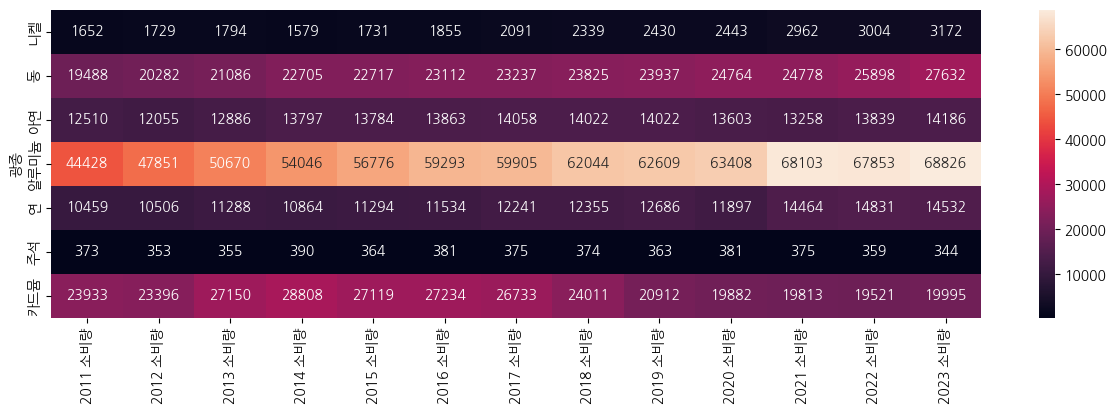

In [9]:
import seaborn as sns
import koreanize_matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(15,4))
sns.heatmap(df1_consume, annot=True, fmt=".0f")

* 상대적으로 알루미늄의 소비량이 가장 많음
  * 공모전 조원에게 받은 한국지질자원연구서의 보고서에 따르면, 지각 내에 3번째로 많이 들어있음
    (2022.02 비철금속 비축 효과성/타당성 평가분석 및 중장기 정부비축방향)
  * 항공, 건축, 전기, 내화 등 다양한 용도로 사용되고 있으며, 4차 핵심사업의 용도로는  부합하지 않는 것으로 판단됨

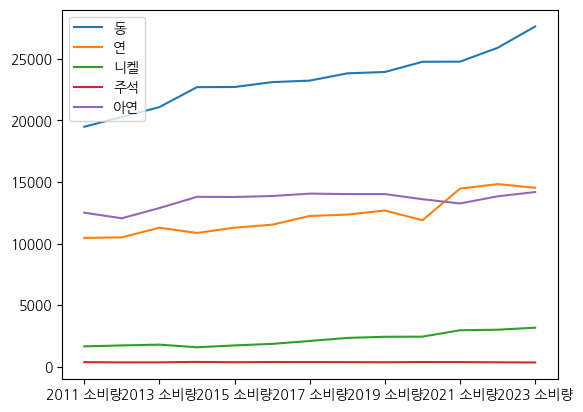

In [13]:
for ore in df_1['광종'].unique():
    if ore == '알루미늄' or ore == '카드뮴':
        continue
    df1_consume.loc[ore].plot()
plt.legend()

* 알루미늄을 제외하고 소비량이 상승하고 있는 광물 위주로 추림
  * 앞서 알루미늄에 대한 시각과 같이 4차 핵심사업의 용도로는 `니켈`만이 유력

<Axes: >

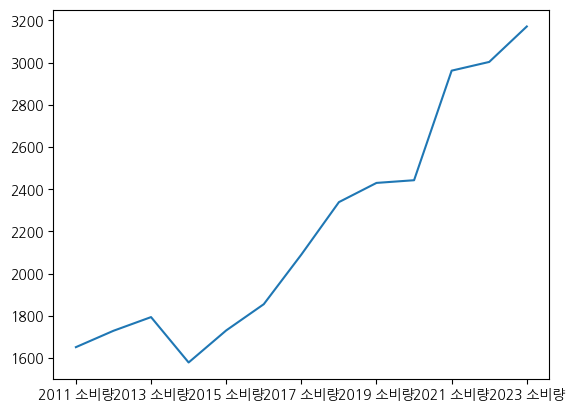

In [84]:
df1_consume.loc['니켈'].plot()


#### 광종별 생산량
* 공공데이터포털 - 한국광해광업공단_광종별 국가별 생산량 <br>
  https://www.data.go.kr/data/3070256/fileData.do#/API%20%EB%AA%A9%EB%A1%9D/getuddi%3A6d31d5bc-5487-4fa1-a335-90f9d9623cc8_202004080953

In [14]:
base_url = 'https://api.odcloud.kr/api'
address_get = '/3070256/v1/uddi:6d31d5bc-5487-4fa1-a335-90f9d9623cc8_202004080953'
url = f'{base_url}{address_get}?page=1&perPage=1&serviceKey={serviceKey}'

json_2 = download_from_data_go_kr_with_json(url)
chk_json_status_of_data_go_kr(json_2)

{'currentCount': 695,
 'matchCount': 695,
 'page': 1,
 'perPage': 695,
 'totalCount': 695}

In [15]:
df_2 = pd.json_normalize(json_2['data'])
df_2

,2011 생산량,2012 생산량,2013 생산량,2014 생산량,2015 생산량,2016 생산량,2017 생산량,2018 생산량,2019 생산량,2020 생산량,2021 생산량,2022 생산량,2023 생산량,광종,국가,단위,대륙,품목
0,561.354,800.316,657.100,605.215,787.404,738.612,740.380,760.244,1043.343,619.748,675.269,669.926,542.114,알루미늄,Bosnia,천톤,EUROPE,bauxite
1,0.000,0.000,0.000,0.000,11.900,9.800,12.200,11.800,14.300,14.100,14.500,13.800,13.800,알루미늄,Croatia,천톤,EUROPE,bauxite
2,80.800,90.129,100.000,71.100,70.000,110.000,110.000,110.000,120.760,123.496,142.764,120.000,120.000,알루미늄,France,천톤,EUROPE,bauxite
3,2324.000,1815.328,1844.000,1876.000,1831.270,1880.000,1927.145,1559.360,1379.123,1428.639,1227.000,1173.000,869.100,알루미늄,Greece,천톤,EUROPE,bauxite
4,277.800,255.100,93.700,14.400,8.300,16.700,4.000,5.000,0.000,0.000,0.000,0.000,0.000,알루미늄,Hungary,천톤,EUROPE,bauxite
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,662.151,648.619,651.637,649.218,683.118,691.400,598.438,620.202,654.971,685.400,639.843,569.613,502.000,아연,Canada,천톤,AMERICA,slab
691,322.116,323.569,322.781,320.924,326.834,321.166,327.000,335.942,393.418,368.200,357.000,328.727,344.151,아연,Mexico,천톤,AMERICA,slab
692,313.714,319.280,346.361,336.454,335.422,341.518,312.339,333.677,356.925,318.619,320.000,349.500,346.072,아연,Peru,천톤,AMERICA,slab
693,248.000,261.000,233.000,180.000,172.000,126.000,132.000,116.000,115.000,180.000,216.000,216.000,220.000,아연,U.S.A.,천톤,AMERICA,slab


In [16]:
# 광종 및 생산량 확인
print(df_2['광종'].unique())
print(df_2.columns)

['알루미늄' '안티모니' '카드뮴' '동' '금' '연' '몰리브덴' '니켈' '은' '주석' '아연']
Index(['2011 생산량', '2012 생산량', '2013 생산량', '2014 생산량', '2015 생산량', '2016 생산량',
       '2017 생산량', '2018 생산량', '2019 생산량', '2020 생산량', '2021 생산량', '2022 생산량',
       '2023 생산량', '광종', '국가', '단위', '대륙', '품목'],
      dtype='object')


In [17]:
# str처리된 float값 변환
df_2[['2011 생산량', '2012 생산량', '2013 생산량', '2014 생산량', '2015 생산량', '2016 생산량',
       '2017 생산량', '2018 생산량', '2019 생산량', '2020 생산량', '2021 생산량', '2022 생산량',
       '2023 생산량']] = df_2[['2011 생산량', '2012 생산량', '2013 생산량', '2014 생산량', '2015 생산량', '2016 생산량',
       '2017 생산량', '2018 생산량', '2019 생산량', '2020 생산량', '2021 생산량', '2022 생산량',
       '2023 생산량']].astype(float)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695 entries, 0 to 694
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   2011 생산량  691 non-null    float64
 1   2012 생산량  695 non-null    float64
 2   2013 생산량  695 non-null    float64
 3   2014 생산량  695 non-null    float64
 4   2015 생산량  695 non-null    float64
 5   2016 생산량  695 non-null    float64
 6   2017 생산량  695 non-null    float64
 7   2018 생산량  695 non-null    float64
 8   2019 생산량  695 non-null    float64
 9   2020 생산량  695 non-null    float64
 10  2021 생산량  695 non-null    float64
 11  2022 생산량  694 non-null    float64
 12  2023 생산량  694 non-null    float64
 13  광종        695 non-null    object 
 14  국가        695 non-null    object 
 15  단위        695 non-null    object 
 16  대륙        695 non-null    object 
 17  품목        695 non-null    object 
dtypes: float64(13), object(5)
memory usage: 97.9+ KB


In [18]:
# 광종별 생산량
df2_produce = df_2.groupby(by=['광종'])[['2011 생산량', '2012 생산량', '2013 생산량', '2014 생산량', '2015 생산량', '2016 생산량',
       '2017 생산량', '2018 생산량', '2019 생산량', '2020 생산량', '2021 생산량', '2022 생산량',
       '2023 생산량']].sum()
df2_produce

,2011 생산량,2012 생산량,2013 생산량,2014 생산량,2015 생산량,2016 생산량,2017 생산량,2018 생산량,2019 생산량,2020 생산량,2021 생산량,2022 생산량,2023 생산량
광종,,,,,,,,,,,,,
금,2570.328,2644.576,2886.315,3017.911,3083.170,3180.769,3.238410e+03,3.263709e+03,3.211746e+03,3.066197e+03,3.041123e+03,3.147309e+03,3.138277e+03
니켈,3467.292,4140.150,4538.125,3925.512,3970.324,3839.161,4.229470e+03,4.623132e+03,4.964282e+03,4.972969e+03,5.467607e+03,6.303324e+03,7.216948e+03
동,35816.170,37138.574,39170.057,41019.128,42338.447,43631.801,4.364408e+04,4.403226e+04,4.399504e+04,4.471063e+04,4.588754e+04,4.758409e+04,5.004668e+04
몰리브덴,268.602,266.883,278.853,303.501,296.261,283.849,2.915410e+02,2.731790e+02,2.764260e+02,2.893510e+02,2.688010e+02,2.858460e+02,2.804480e+02
아연,25676.388,25887.690,26613.454,27099.928,27286.373,26155.233,2.563553e+04,2.541092e+04,2.568426e+04,2.614851e+04,2.747017e+04,2.712567e+04,2.750890e+04
안티모니,156163.000,174973.000,192551.000,158041.000,155999.000,165096.000,1.590890e+05,1.601380e+05,1.227800e+05,1.142970e+05,8.946900e+04,8.533900e+04,8.443900e+04
알루미늄,295511.409,308026.690,351054.187,311065.456,328534.809,341423.066,3.746015e+05,4.011228e+05,4.261662e+05,4.469730e+05,4.548925e+05,4.549827e+05,4.715010e+05
연,15435.226,15814.869,16593.862,16246.173,15871.816,16294.015,1.629023e+04,1.651490e+04,1.688362e+04,1.626823e+04,1.897150e+04,2.043378e+04,1.952917e+04
은,23282.594,24903.406,26174.528,27279.117,27848.245,28038.988,2.643421e+04,2.651451e+04,2.625192e+04,2.425894e+04,2.563196e+04,2.477051e+04,2.527272e+04


* 앞서 소비량 분석에서 4차 핵심산업에 부합하지 않을 것으로 배제했던 광물을 제외하고 확인

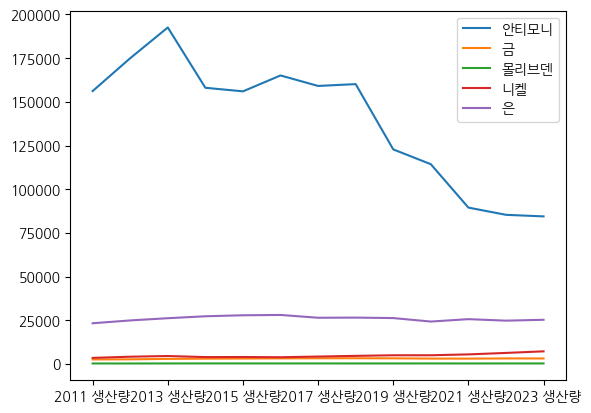

In [24]:
for ore in df_2['광종'].unique():
    if ore not in ['동', '연', '주석', '아연', '알루미늄', '카드뮴']:
        df2_produce.loc[ore].plot()
plt.legend()

* 생산량이 감소하고 있는 안티모니는 어떤 금속인지에 대해 조사
  * 방염, 페인트 합금, 고무 등에 사용되는 것으로, 안티모니도 대상에서 배제

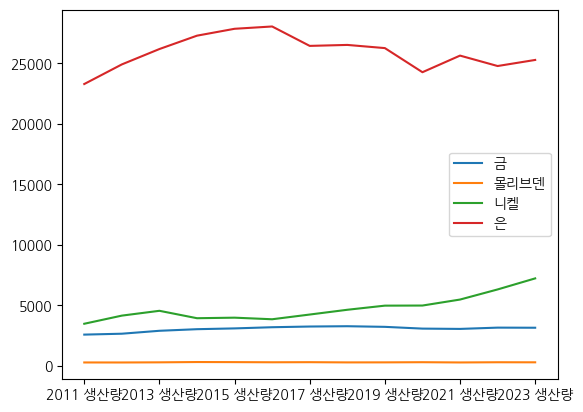

In [23]:
for ore in df_2['광종'].unique():
    if ore not in ['동', '연', '주석', '아연', '알루미늄', '카드뮴','안티모니']:
        df2_produce.loc[ore].plot()
plt.legend()

In [54]:
# 니켈에 대한 국가별 생산량
df2_produce_country = df_2[df_2['광종']=='니켈'].groupby(by=['국가'])[['2011 생산량', '2012 생산량', '2013 생산량', '2014 생산량', '2015 생산량', '2016 생산량',
       '2017 생산량', '2018 생산량', '2019 생산량', '2020 생산량', '2021 생산량', '2022 생산량',
       '2023 생산량']].sum()
df2_produce_country

,2011 생산량,2012 생산량,2013 생산량,2014 생산량,2015 생산량,2016 생산량,2017 생산량,2018 생산량,2019 생산량,2020 생산량,2021 생산량,2022 생산량,2023 생산량
국가,,,,,,,,,,,,,
Albania,3.528,0.728,2.086,4.889,6.309,3.952,5.301,4.204,2.830,3.764,3.615,1.423,0.548
Australia,325.227,407.700,433.872,403.943,378.205,323.656,293.966,274.539,265.220,285.144,249.845,251.507,241.140
Austria,0.500,0.500,0.500,0.600,0.700,0.700,0.700,0.700,0.700,0.700,0.700,1.000,1.000
Botswana,15.675,17.948,22.848,14.952,16.788,16.878,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Brazil,117.801,148.344,130.611,160.924,159.906,155.788,137.303,130.454,109.944,136.633,136.788,142.700,131.400
Canada,361.470,358.551,380.471,378.353,384.236,393.333,369.061,323.373,317.894,282.033,235.219,191.807,214.341
China,559.536,684.172,803.857,638.237,554.597,537.173,723.282,841.119,957.049,857.237,912.392,974.155,1044.821
Colombia,75.636,103.188,98.772,82.400,73.400,74.170,81.200,86.200,81.200,72.200,76.600,83.600,77.400
Cuba,102.532,94.926,72.236,64.839,64.731,62.759,65.041,63.620,58.430,63.144,64.929,66.101,62.213


In [60]:
# 니켈에 대한 국가별 생산량의 총 합계
df2_produce_country_total = df2_produce_country[['2011 생산량', '2012 생산량', '2013 생산량', '2014 생산량', '2015 생산량', '2016 생산량',
       '2017 생산량', '2018 생산량', '2019 생산량', '2020 생산량', '2021 생산량', '2022 생산량',
       '2023 생산량']].sum(axis=1)
df2_produce_country_total.sort_values(ascending=False)

국가
Indonesia             14748.300
China                 10087.627
Russia                 5515.723
Philippines            4762.154
Canada                 4190.142
Australia              4133.964
New Caledonia          3390.495
Japan                  2295.233
Brazil                 1798.596
Norway                 1181.589
Finland                1155.292
Colombia               1065.966
South Africa           1043.620
Cuba                    905.501
Madagascar              744.918
Guatemala               604.333
United Kingdom          485.841
South Korea             482.372
Dominican Republic      415.506
Myanmar                 372.438
Greece                  349.362
Papua New Guinea        321.394
Ukraine                 224.412
Zimbabwe                206.071
Macedonia               188.303
U.S.A.                  177.704
Ivory Coast             140.499
Kosovo                  129.253
Turkey                  120.644
Botswana                105.089
France                  103.422
Venez

* 니켈 총생산량 기준 상위 10개국에 대한 시각화진행
  * 인도네시아, 중국, 러시아, 필리핀 순으로 상위 생산국

<Axes: >

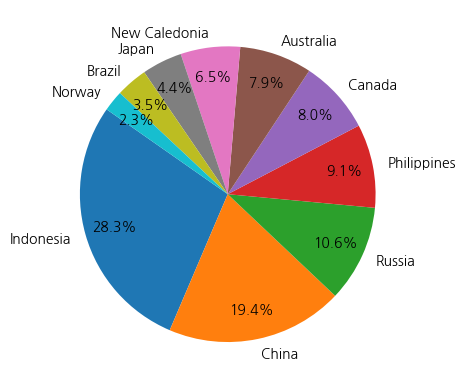

In [76]:
# 니켈 총생산량 내림차순 기준 상위 10개국 Pie chart
target_country = df2_produce_country_total.sort_values(ascending=False)[0:10].index.tolist()
df2_produce_country_total.loc[target_country].plot(kind='pie',startangle=145, autopct='%.1f%%', pctdistance=0.8)


* 니켈에 대한 모델링 등을 할때, 주요 생산국의 관련 지표를 넣으면 좋을 듯 함

#### 광종별 수출입 현황

* 공공데이터포털 - 한국광해광업공단_광종별 국내 수출입 현황 <br>
  https://www.data.go.kr/data/3070177/fileData.do

In [78]:
base_url = 'https://api.odcloud.kr/api'
address_get = '/3070177/v1/uddi:09b79733-b804-4ec6-9968-dd0f58638b55_202004090938'
url = f'{base_url}{address_get}?page=1&perPage=1&serviceKey={serviceKey}'

json_3 = download_from_data_go_kr_with_json(url)
chk_json_status_of_data_go_kr(json_3)

{'currentCount': 116,
 'matchCount': 116,
 'page': 1,
 'perPage': 116,
 'totalCount': 116}

In [79]:
df_3 = pd.json_normalize(json_3['data'])
df_3

,광종,분류,수입금액(천불),수입중량(톤),수출금액(천불),수출중량(톤),연도
0,금광,금속광,67000,5705.000,116,1005.000,2021
1,은광,금속광,302335,37635.000,79,63.000,2021
2,동광,금속광,6017233,2097948.000,1185720,560664.000,2021
3,연광,금속광,2366631,642414.000,670,1102.000,2021
4,아연광,금속광,2044885,1819759.000,34679,23804.000,2021
...,...,...,...,...,...,...,...
111,하석,비금속광,144,321.000,1,0.000,2022
112,무연탄,석탄광,1661049,5384000.000,251,375.000,2022
113,유연탄,석탄광,26230599,117752000.000,0,0.000,2022
114,갈탄,석탄광,65,107.000,0,0.000,2022


In [80]:
# 광종 및 소비량 확인
print(df_3['광종'].unique())
print(df_3.columns)

['금광' '은광' '동광' '연광' '아연광' '철광' '텅스텐광' '몰리브덴광' '망간광' '주석광' '창연' '안티모니광'
 '비소광' '황철석' '니켈' '코발트' '크롬광' '리튬광' '티타늄광' '질코늄광' '알루미늄광' '백금광' '탄탈륨광'
 '바나듐광' '니오븀광' '게르마늄광' '기타 금속' '인상흑연' '토상흑연' '활석' '납석' '장석' '고령토류' '석회석류'
 '규석' '규사' '황' '규조토' '형석' '인광석' '규회석' '운모' '주사' '홍주석' '규선석' '남정석' '중정석'
 '마그네사이트' '석고' '불석' '수정' '붕소광' '금강석' '하석' '기타 비금속' '무연탄' '유연탄' '갈탄' '토탄'
 '기타 석탄']
Index(['광종', '분류', '수입금액(천불)', '수입중량(톤)', '수출금액(천불)', '수출중량(톤)', '연도'], dtype='object')


In [81]:
# str처리된 float값 변환
df_3[['수입중량(톤)', '수출중량(톤)',]] = df_3[['수입중량(톤)', '수출중량(톤)']].astype(float)
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   광종        116 non-null    object 
 1   분류        116 non-null    object 
 2   수입금액(천불)  116 non-null    int64  
 3   수입중량(톤)   116 non-null    float64
 4   수출금액(천불)  116 non-null    int64  
 5   수출중량(톤)   116 non-null    float64
 6   연도        116 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 6.5+ KB


* 공모전에 언급된 주요광물에 대해서 추림

In [82]:
df3_sorted = df_3[df_3['광종'].isin(['텅스텐광','망간광','니켈','코발트','리튬광','알루미늄광'])]
df3_sorted

,광종,분류,수입금액(천불),수입중량(톤),수출금액(천불),수출중량(톤),연도
6,텅스텐광,금속광,60,1.0,84,8.0,2021
8,망간광,금속광,290356,1325095.0,0,0.0,2021
14,니켈,금속광,340685,3181534.0,42,86.0,2021
15,코발트,금속광,1,0.0,0,0.0,2021
17,리튬광,금속광,1047778,94839.0,53933,4980.0,2021
20,알루미늄광,금속광,33126,424540.0,45,156.0,2021
66,텅스텐광,금속광,607,40.0,3559,1241.0,2022
68,망간광,금속광,283632,1085930.0,5,113.0,2022
74,니켈,금속광,382427,2653287.0,206,108.0,2022
75,코발트,금속광,95,12.0,0,0.0,2022


In [83]:
for ore in ['텅스텐광','망간광','니켈','코발트','리튬광','알루미늄광']:
    print(df3_sorted[df3_sorted['광종']==ore])
    print()

      광종   분류  수입금액(천불)  수입중량(톤)  수출금액(천불)  수출중량(톤)    연도
6   텅스텐광  금속광        60      1.0        84      8.0  2021
66  텅스텐광  금속광       607     40.0      3559   1241.0  2022

     광종   분류  수입금액(천불)    수입중량(톤)  수출금액(천불)  수출중량(톤)    연도
8   망간광  금속광    290356  1325095.0         0      0.0  2021
68  망간광  금속광    283632  1085930.0         5    113.0  2022

    광종   분류  수입금액(천불)    수입중량(톤)  수출금액(천불)  수출중량(톤)    연도
14  니켈  금속광    340685  3181534.0        42     86.0  2021
74  니켈  금속광    382427  2653287.0       206    108.0  2022

     광종   분류  수입금액(천불)  수입중량(톤)  수출금액(천불)  수출중량(톤)    연도
15  코발트  금속광         1      0.0         0      0.0  2021
75  코발트  금속광        95     12.0         0      0.0  2022

     광종   분류  수입금액(천불)  수입중량(톤)  수출금액(천불)  수출중량(톤)    연도
17  리튬광  금속광   1047778  94839.0     53933   4980.0  2021

       광종   분류  수입금액(천불)   수입중량(톤)  수출금액(천불)  수출중량(톤)    연도
20  알루미늄광  금속광     33126  424540.0        45    156.0  2021
79  알루미늄광  금속광     33150  417762.0        46    478.0  2022



[광종별 간단 요약]

* 텅스텐 : 수입 금액/중량 증가(가격비 비슷), 수출 금액/중량 증가
* 망간 : 수입 금액/중량 감소
* 니켈 : 수입 금액 증가, 수입 중량 감소 (가격 증가)
* 코발트 : 수입 급격한 증가, 수출은 없음
* 리튬 : 비교가능 데이터 없음

[수출입 데이터 기준 고려사항]

* 니켈 : 수입량과 가격 모두 증가
* 니켈(수입량 증가와 가격 증가 추세로, 추가분석 필요하여 **하단에서 계속 진행**)
* 코발트(수입 급격히 증가했으나 수출실적은 전혀없는 상황으로 국내 매장량 등 분석하고자 함)
  * 시간 상 관련 수치자료를 찾지 못하여 간단히 몇가지 검색해보니, 소요량에 대한 기사 발견 <br>
    * [기사]한국기업의 귀속생산량이 전세계 총합 대비 1% 이하 수준 https://www.businesspost.co.kr/BP?command=article_view&num=353613
    * [한국경제인협회] 니켈, 리튬, 코발트에 대한 주요 생산국 및 수입량 추이 https://www.fki.or.kr/main/news/statement_detail.do?bbs_id=00035573&category=ST

### 결론
* 추가적인 분석에 따라 달라지겠지만 현재로서는 아래와 같음
* `니켈`
  * 4차 핵심사업에 소요되는 광물로 2011년 대비 2배이상 소요량 증가
  * 생산량이 증가하고 있으나 주요 3개국 생산량이 58.3%로 편중으로 인한 리스크 큼<br>(생산국:인도네시아, 중국, 러시아)
  * 자료 시기가 2021, 2022년으로 많지는 않지만, 수입량의 감소에도 수입금액이 늘었다는 것은 가격 상승이 예상되는 상황
  * 소요량, 생산량, 수입데이터 기준 가격상승 예상 등 리스크가 있어보여 위험요소 탐지가 필요한 광물로 보임
* `코발트`
  * 수입량은 급격히 증가했으나, 수출량은 전무한 상황으로 생산자체가 불가하거나 국내 사용만으로도 부족한 상황이 아닐지 추측
  * 간단히 구글링하였을 때, 기사에 따르면 코발트 생산은 콩고 생산량이 68.8%일 정도로 편중이 심함
  * 코발트 또한 이차 전지에 활용되는 핵심광물로 위험 요소 탐지가 필요해보임

* `니켈`에 대해 분석한 내용을 모델링할 때 감안하거나, 최종보고서의 핵심광물 위험요소에 대한 당위성 부여 등에 활용하고자 함